In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm


# TP Optimisation - Descente du gradient
## 1. Étude de la fonction de Rosenbrock

Soit 
$$f(x,y) = (x-1)^2 + 10(x^2-y)^2.$$

1. Montrer que $f$ admet un unique minimum et le déterminer.

On remarque que $f(x,y)\ge 0$. De plus $f(x,y)=(0,0) \Leftrightarrow (x,y)=(1,1),  \forall (x,y) \in \mathbb{R}^2$, donc le point $(1,1)$ est l'unique point de minimum global de $f$. 

In [39]:
def frosenbrock(x,y):
    return (x-1)**2 + 10*(x**2 - y)**2

2.Representations graphiques de f.

In [40]:
x = np.arange(-2.0,2.0,0.02)
y = np.arange(-1.0,4.0,0.02)
X, Y = np.meshgrid(x,y)
Z = frosenbrock(X,Y)

In [41]:
from matplotlib import cm

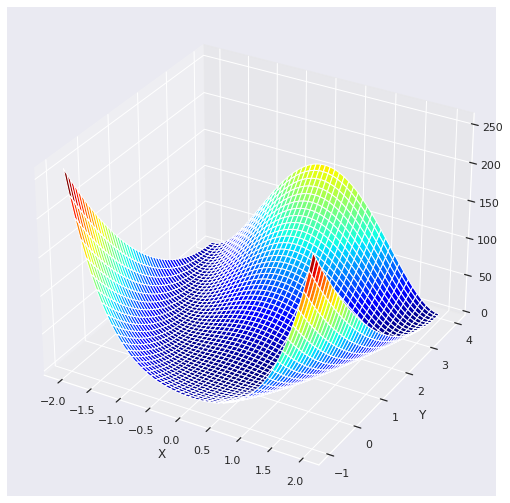

In [42]:

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


3.La fonction $f$ est-elle convexe ?

On remarque que $f$ n'est pas convexe. Par exemple, on a que :
	$f(-1,1)=4$, $f(1,1)=0$ et $f(0,1)=10$ donc que :
	$$10=f\left(\frac{1}{2}(-1,1)+\frac{1}{2}(1,1)\right)> \frac{1}{2}f(-1,1)+\frac{1}{2}f(-1,1)=2$$

4. Représenter également les contours de $f$.

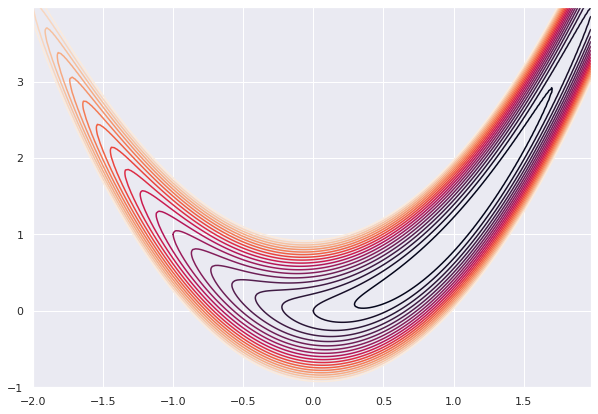

In [43]:
plt.figure(figsize=(10,7))
plt.contour(X,Y,Z,np.arange(0.5,10,0.5))

# 2. Descente du gradient

1. Programmer la méthode de descente de gradient à pas fixe : écrire une fonction prenant comme arguments le point de départ $x_0$, le nombre maximal d'itérations $N$, le pas de descente $\alpha,$ le seuil d'arrêt $\epsilon$, ainsi qu'une fonction permettant d'évaluer le gradient $\nabla f$.

In [44]:
def gradfrosenbrock(x,y): 
    g = np.array([[2*(x-1) + 40*x*(x**2-y) , -20*(x**2-y)]])
    return(g)
def graddesc(x0,alpha,N,epsilon,gradfunc):
    counter=0
    displacement=10
    x=np.copy(x0)
    while ((counter < N) and (displacement > epsilon)):
        gk = gradfunc(x[counter,0],x[counter,1])
        xnext = x[counter] - alpha*gk
        x = np.append(x,xnext,axis=0)
        displacement=np.sqrt(np.sum((xnext-x[counter])**2))
        counter = counter+1
    return x

2. Tests pour différentes valeurs des paramètres.  

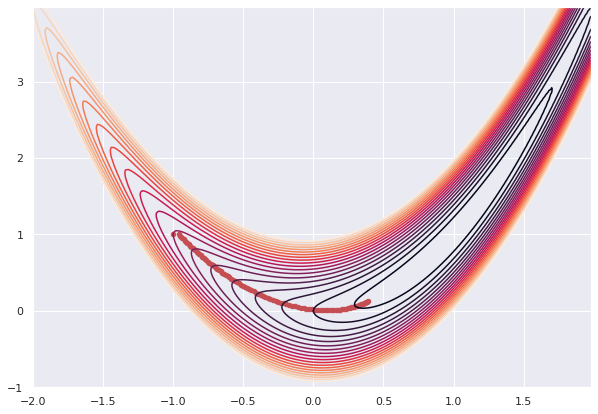

In [45]:
sns.set_theme()
xstar=np.array([1,1])
x0 = np.array([[-1,1]])
x = graddesc(x0=x0,alpha=0.01,N=100,epsilon=0.001,gradfunc=gradfrosenbrock)
fig = plt.figure(figsize=(10,7))
plt.contour(X,Y,Z,np.arange(0.5,10,0.5))
plt.scatter(x[:,0],x[:,1],c='r',s=20)

On voit que nous n'avons pas encore atteint le point cible (1,1). On essaie de se raprocher en augmentant le nombre maximal d'itérations.

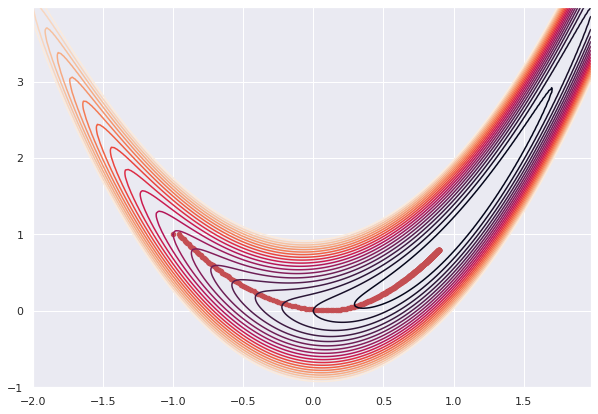

In [46]:
x = graddesc(x0=x0,alpha=0.01,N=1000,epsilon=0.001,gradfunc=gradfrosenbrock)
fig = plt.figure(figsize=(10,7))
plt.contour(X,Y,Z,np.arange(0.5,10,0.5))
plt.scatter(x[:,0],x[:,1],c='r',s=20)

Remarque: La descente s'arrête avant d'exécuter le nombre maximal d'itérations car l'avancement devient trop lent.

In [47]:
print("L'algorithme s'est arreté après "+ str(len(x)-1)+" itérations")
print("L'écart entre les deux dernières itérations est "+str( np.sqrt(np.sum((x[-1]-x[-2])**2))))
print("L'erreur finale est de "+str( np.sqrt(np.sum((xstar-x[-1])**2))))

L'algorithme s'est arreté après 385 itérations
L'écart entre les deux dernières itérations est 0.0009982603950398647
L'erreur finale est de 0.222842133810467


On essaie de diminuer $\epsilon$.

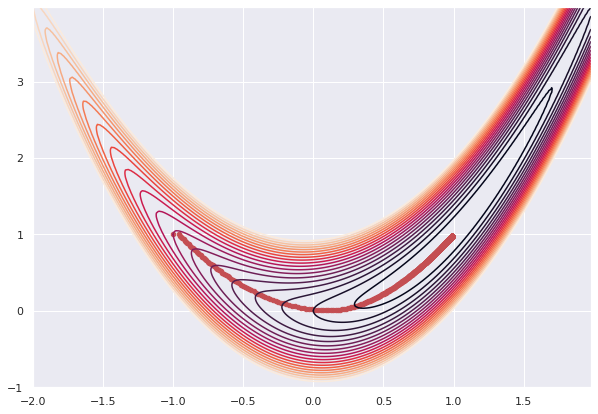

In [48]:
x = graddesc(x0=x0,alpha=0.01,N=1000,epsilon=10**(-5),gradfunc=gradfrosenbrock)
fig = plt.figure(figsize=(10,7))
plt.contour(X,Y,Z,np.arange(0.5,10,0.5))
plt.scatter(x[:,0],x[:,1],c='r',s=20)

In [49]:
print("L'algorithme s'est arreté après "+ str(len(x)-1)+" itérations")
print("L'écart entre les deux dernières itérations est "+str( np.sqrt(np.sum((x[-1]-x[-2])**2))))
print("L'erreur finale est de "+str( np.sqrt(np.sum((xstar-x[-1])**2))))

L'algorithme s'est arreté après 1000 itérations
L'écart entre les deux dernières itérations est 7.057024530636957e-05
L'erreur finale est de 0.017689205810584016


Nous sommes déjà proches du minimum global et si on augmente $N$, l'erreur diminue encore plus.

In [50]:
x = graddesc(x0=x0,alpha=0.01,N=2000,epsilon=10**(-5),gradfunc=gradfrosenbrock)
print("L'erreur finale est de "+str(np.sqrt(np.sum((xstar-x[-1])**2))))

L'erreur finale est de 0.0025200955046429953


On essaie d'augmenter le pas $\alpha$. 

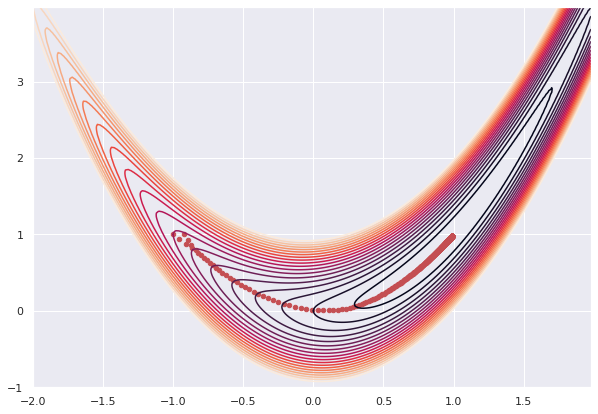

In [51]:
x = graddesc(x0=x0,alpha=0.02,N=500,epsilon=0.0001,gradfunc=gradfrosenbrock)
fig = plt.figure(figsize=(10,7))
plt.contour(X,Y,Z,np.arange(0.5,10,0.5))
plt.scatter(x[:,0],x[:,1],c='r',s=20)

In [52]:
print("L'algorithme s'est arreté après "+ str(len(x)-1)+" itérations")
print("L'écart entre les deux dernières itérations est "+str( np.sqrt(np.sum((x[-1]-x[-2])**2))))
print("L'erreur finale est de "+str( np.sqrt(np.sum((xstar-x[-1])**2))))

L'algorithme s'est arreté après 500 itérations
L'écart entre les deux dernières itérations est 0.00014015560058055958
L'erreur finale est de 0.01749683263495786


On peut aussi directement tester plusieurs paramètres un après l'autre :

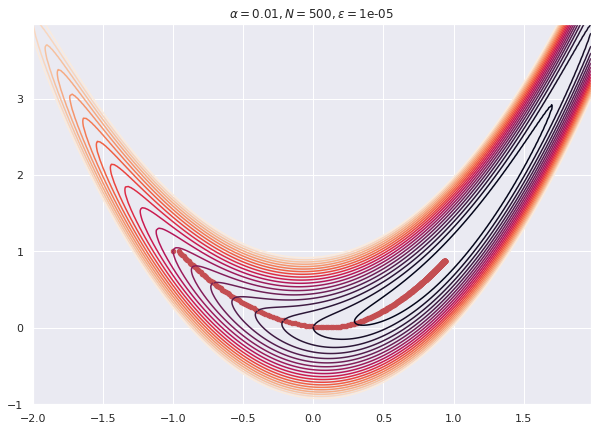

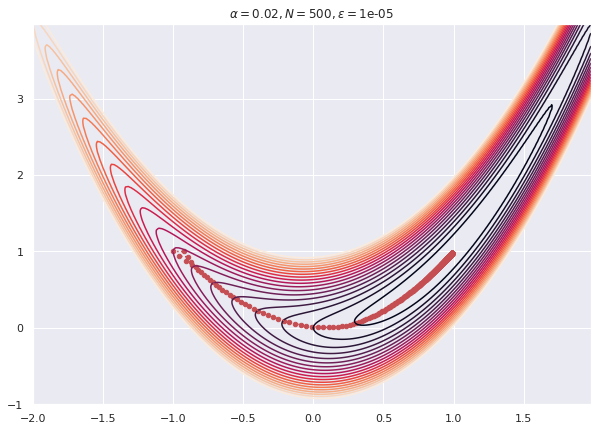

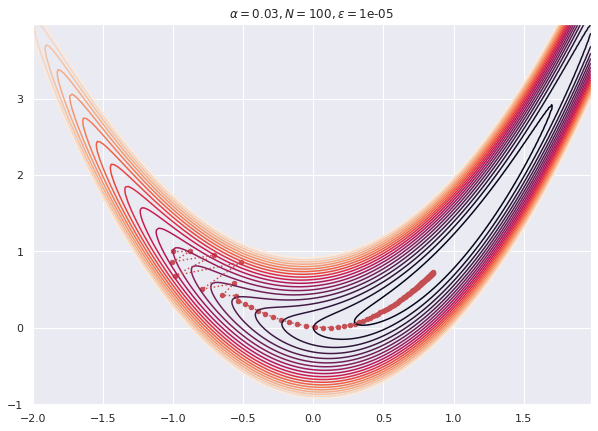

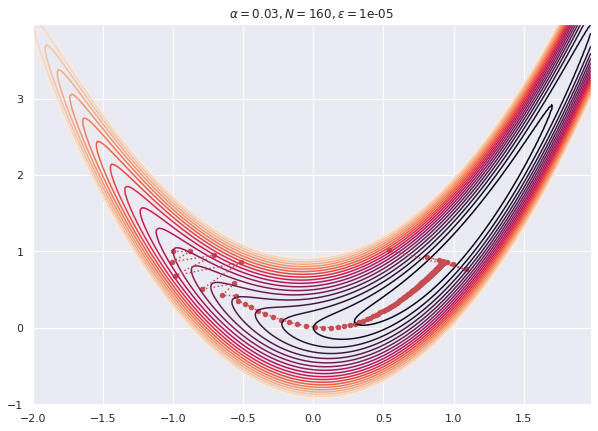

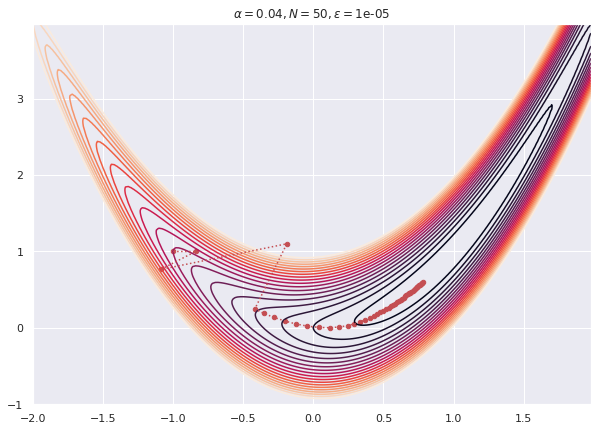

In [53]:
x0 = np.array([[-1,1]])
alpha = [0.01,0.02,0.03,0.03,0.04]
N = [500,500,100,160,50]
epsilon = 10**(-5)
for i in range(0,len(alpha)):
    x = graddesc(x0,alpha[i],N[i],epsilon,gradfrosenbrock)
    fig = plt.figure(figsize=(10,7))
    plt.contour(X,Y,Z,np.arange(0.5,10,0.5))
    plt.plot(x[:,0],x[:,1],c='r',ls=':')
    plt.scatter(x[:,0],x[:,1],c='r',s=20)
    plt.title(r'$\alpha='+str(alpha[i])+',N='+str(N[i])+',\epsilon=$'+str(epsilon))
    plt.show()

# 2. Méthode du gradient à pas optimal

Soit $f$ la fonction définie sur $\mathbb{R}^2$ par 
$$f(x,y) = x^2 + 7y^2.$$



1. Déterminer l'unique point de minimum de $f$.

$f(x,y)\ge 0$, $ \forall (x,y)\in \mathbb{R}^2$ et $f(x,y)=0\Leftrightarrow (x,y)=(0,0) \Rightarrow $  \(f\) admet un minimum unique en \((0,0)\).


2. a) Calculer $\nabla f(x,y)$ :

 $\nabla f(x,y) = (2x,14y)$

b) Montrer que le pas de descente optimal à partir d'un point $(x_k,y_k)$ est 
$$\alpha_k = \frac{x_k^2 + 7^2y_k^2}{2\left(x_k^2 + 7^3y_k^2 \right)}.$$

$$f\left((x,y) - \alpha \nabla f(x,y)\right) = (x - \alpha2x)^2 + 7(y-\alpha14y)^2$$
$$\begin{array}{lcl}
	\partial_\alpha f = 0 & \iff & -4x^2(1-2\alpha) -14y^214(1-14\alpha)=0 \\
	& \iff & x^2(1-2\alpha) + 7^2y^2(1-14\alpha)=0 \\
	& \iff & x^2+7^2y^2 = 2\alpha(x^2 + 7^3y^2) \\
	& \implies & \alpha = \frac{x^2+7^2y^2}{2(x^2+7^3y^2)}.
\end{array}$$


3.  Programmer la méthode de descente de gradient à pas optimal spécifiquement pour la fonction $f$. 

Itérations de l'algorithme à pas optimal :
$$\left(\begin{array}{c}x_{k+1}\\y_{k+1}\end{array}\right)=\left(\begin{array}{c}x_{k}\\y_{k}\end{array}\right)
	-\frac{x_k^2+7^2y_k^2}{2(x_k^2+7^3y_k^2)} \left(\begin{array}{c}2x_{k}\\14y_{k}\end{array}\right).$$

On commence par définir les fonctions specifiques à $f$ :

In [54]:
def fparabola(x,y):
    return x**2 + 7*y**2

def gradfparabola(x,y):
    g = np.array([[2*x,14*y]])
    return(g)

def optstep_parabola(x,y):
    alpha = (x**2+49*y**2)/(2*(x**2+343*y**2))
    return(alpha)

Puis l'algorithme de descente à pas optimal:

In [55]:
def graddesc_opt(x0,N,epsilon,gradfunc,opt_step):
	counter = 0
	displacement = 10.0
	x = np.copy(x0)
	while ((counter < N) and (displacement > epsilon)):
		alpha = opt_step(x[counter,0],x[counter,1])
		gk = gradfunc(x[counter,0],x[counter,1])
		xnext = x[counter] - alpha*gk
		x = np.append(x,xnext,axis=0)
		displacement=np.sqrt(np.sum((xnext-x[counter])**2))
		counter = counter+1
	return(x)

In [56]:
x = np.arange(-8,8,0.08)
y = np.arange(-4,4,0.03)
X, Y = np.meshgrid(x,y)
Z = fparabola(X,Y)
xstar=(0,0)
x0 = np.array([[7,2]])
N = 20
epsilon = 0.001
x_optstep = graddesc_opt(x0,N,epsilon,gradfparabola,optstep_parabola)


L'algorithme s'est arreté après 20 itérations
L'écart entre les deux dernières itérations est 0.002291341868686487
L'erreur finale est de 0.002557737819749429


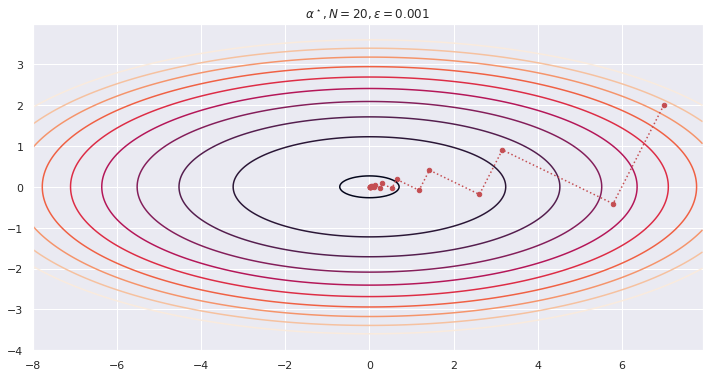

In [57]:
sns.set_theme()
plt.figure(figsize=(12,6))
plt.contour(X,Y,Z,np.arange(0.5,100,10))
plt.plot(x_optstep[:,0],x_optstep[:,1],c='r',ls=':')
plt.scatter(x_optstep[:,0],x_optstep[:,1],c='r',s=20)
plt.title(r'$\alpha^\star,N=20,\epsilon=0.001$')
print("L'algorithme s'est arreté après "+ str(len(x_optstep)-1)+" itérations")
print("L'écart entre les deux dernières itérations est "+str( np.sqrt(np.sum((x_optstep[-1]-x_optstep[-2])**2))))
print("L'erreur finale est de "+str( np.sqrt(np.sum((xstar-x_optstep[-1])**2))))

Descente à pas constant :

L'algorithme s'est arreté après 140 itérations
L'écart entre les deux dernières itérations est 0.0009613010658555722
L'erreur finale est de 0.023071225580533716


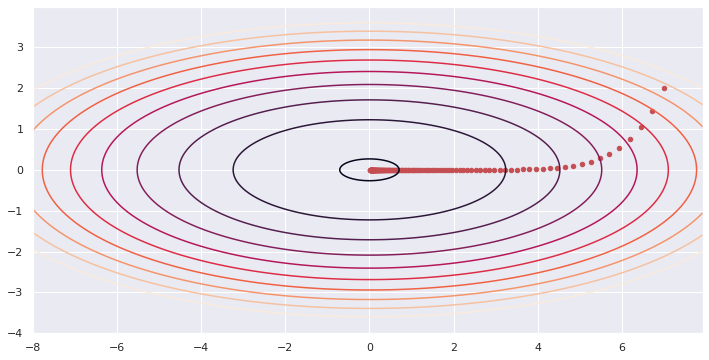

In [58]:
x = graddesc(x0=x0,alpha=0.02,N=200,epsilon=0.001,gradfunc=gradfparabola)
fig = plt.figure(figsize=(12,6))
plt.contour(X,Y,Z,np.arange(0.5,100,10))
plt.scatter(x[:,0],x[:,1],c='r',s=20)
print("L'algorithme s'est arreté après "+ str(len(x)-1)+" itérations")
print("L'écart entre les deux dernières itérations est "+str( np.sqrt(np.sum((x[-1]-x[-2])**2))))
print("L'erreur finale est de "+str( np.sqrt(np.sum((xstar-x[-1])**2))))

Comparaison de normes :

In [59]:
# On met epsilon =0 pour mieux voir la convergence 
x_grad_desc = graddesc(x0=x0,alpha=0.02,N=200,epsilon=0,gradfunc=gradfparabola)
norm_grad_desc=np.linalg.norm(x_grad_desc, ord=2, axis=1) #norme L2 pour le résultat de chaque itération
x_opt_step = graddesc_opt(x0=x0,N=200,epsilon=0,gradfunc=gradfparabola,opt_step=optstep_parabola)
norm_opt_step=np.linalg.norm(x_opt_step, ord=2, axis=1)

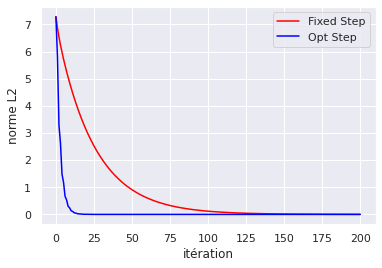

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(norm_grad_desc, color='red', label='Fixed Step')
ax.plot(norm_opt_step, color='blue', label='Opt Step')
ax.legend(loc='upper right')
ax.set_xlabel('itération')
ax.set_ylabel('norme L2')
plt.show()

4. Montrer que la suite $(x_k)$ générée par l'algorithme de descente de gradient à pas optimal satisfait
$$\langle \nabla f(x_k) , \nabla f(x_{k+1}) \rangle = 0.$$


 $x_{k+1} = x_k - \alpha^\star \nabla f(x_k)$ où $\alpha^\star$ est le pas optimal à l'itération $k$.
$\alpha^\star$ est solution de $\partial_\alpha f(x_k-\alpha\nabla f(x_k)) = 0$.
 Or, en notant $x_k=(x_{k,1},x_{k,2})$,
 $$\begin{array}{lcl}
\partial_\alpha f(x_k-\alpha\nabla f(x_k)) & = & \partial_\alpha f(x_{k,1} - \alpha \partial_x f(x_k),x_{k,2} - \alpha \partial_y f(x_k))\\
 & = & -\partial_x f(x_k) \partial_x f(x_k-\alpha\nabla f(x_k)) \\
 & & \quad - \partial_y f(x_k) \partial_yf(x_k-\alpha\nabla f(x_k)) \\
 & = & -\langle \nabla f(x_k) , \nabla f(x_k-\alpha\nabla f(x_k)) \rangle.
\end{array}$$



 D'où
$$\langle\nabla f(x_{k+1}),\nabla f(x_k)\rangle = 0.$$

$\leadsto$ à chaque itération, la direction de descente est orthogonale avec la direction de descente précédente.

# 3. Fonction déséquilibrée

Soit $f:\mathbb{R}^2\to \mathbb{R}$, $f(x,y)=0.1x^2+10y^2$.
1. Appliquer l'algorithme de descente de gradient à pas fixe pour optimiser $f$.

Le gradient de $f$ est donné par : $\nabla f(x,y)=(0.2x,20y)$

In [61]:
def gradf(x,y):
    g = np.array([[0.2*x,20*y]])
    return(g)

In [62]:
x0=np.array([[2,2]])
x_grad_desc = graddesc(x0=x0,alpha=0.02,N=200,epsilon=0,gradfunc=gradf)


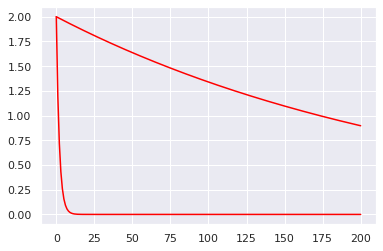

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x_grad_desc, color='red', label='Fixed Step')
plt.show()

Il est difficile de trouver un pas convenable pour les deux coordonnées.

2. Faire la même chose avec la méthode de Newton. Commenter les résultats.

En calculant la hessienne de $f$, on observe que l'algorithme de Newton converge après la première itération, indépendamment du point de départ.